In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [66]:
kiva = pd.read_csv('kivasmall.csv')

In [67]:
kiva.shape

(419156, 28)

Variables of interest: 



In [68]:
kiva.head(2)

,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,COUNTRY_CODE,LENDER_TERM,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,word_count_DT,...,PIC_TRUE_COUNT,PIC_FALSE_COUNT,ANY_FEM,ANY_MALE,word_char_DT,word_char_TAGS,word_char_LU,MALE_FEM,MALE_PIC,FEM_PIC
0,Spanish,1075.0,1,miscellaneous,Health,EC,6.0,monthly,field_partner,192,...,1.0,0.0,1.0,1.0,177408,180,104,1.0,1.0,1.0
1,English,400.0,0,Personal Products Sales,Retail,PH,14.0,monthly,field_partner,75,...,1.0,0.0,1.0,1.0,27825,84,828,1.0,1.0,1.0


In [69]:
kiva.isnull().sum()

ORIGINAL_LANGUAGE     3239
LOAN_AMOUNT              0
STATUS                   0
ACTIVITY_NAME            0
SECTOR_NAME              0
COUNTRY_CODE             0
LENDER_TERM              0
REPAYMENT_INTERVAL       0
DISTRIBUTION_MODEL       0
word_count_DT            0
word_count_TAGS          0
word_count_LU            0
char_count_DT            0
char_count_TAGS          0
char_count_LU            0
month                    0
FEM_COUNT             3239
MALE_COUNT            3239
PIC_TRUE_COUNT        3239
PIC_FALSE_COUNT       3239
ANY_FEM               3239
ANY_MALE              3239
word_char_DT             0
word_char_TAGS           0
word_char_LU             0
MALE_FEM              3239
MALE_PIC              3239
FEM_PIC               3239
dtype: int64

In [70]:
fill_values = {'ORIGINAL_LANGUAGE' : 'MISSING', 'FEM_COUNT' : 0, 'MALE_COUNT' : 0,'PIC_TRUE_COUNT' : 0, 'PIC_FALSE_COUNT' : 0,'ANY_FEM' : 0,'ANY_MALE' : 0,'COUNTRY_CODE':'MISSING', 'MALE_FEM':0,'MALE_PIC':0,'FEM_PIC':0}
kiva .fillna(value = fill_values, inplace=True)

In [71]:
kiva.isnull().sum()

ORIGINAL_LANGUAGE     0
LOAN_AMOUNT           0
STATUS                0
ACTIVITY_NAME         0
SECTOR_NAME           0
COUNTRY_CODE          0
LENDER_TERM           0
REPAYMENT_INTERVAL    0
DISTRIBUTION_MODEL    0
word_count_DT         0
word_count_TAGS       0
word_count_LU         0
char_count_DT         0
char_count_TAGS       0
char_count_LU         0
month                 0
FEM_COUNT             0
MALE_COUNT            0
PIC_TRUE_COUNT        0
PIC_FALSE_COUNT       0
ANY_FEM               0
ANY_MALE              0
word_char_DT          0
word_char_TAGS        0
word_char_LU          0
MALE_FEM              0
MALE_PIC              0
FEM_PIC               0
dtype: int64

In [72]:
kiva.columns

Index(['ORIGINAL_LANGUAGE', 'LOAN_AMOUNT', 'STATUS', 'ACTIVITY_NAME',
       'SECTOR_NAME', 'COUNTRY_CODE', 'LENDER_TERM', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'word_count_DT', 'word_count_TAGS',
       'word_count_LU', 'char_count_DT', 'char_count_TAGS', 'char_count_LU',
       'month', 'FEM_COUNT', 'MALE_COUNT', 'PIC_TRUE_COUNT', 'PIC_FALSE_COUNT',
       'ANY_FEM', 'ANY_MALE', 'word_char_DT', 'word_char_TAGS', 'word_char_LU',
       'MALE_FEM', 'MALE_PIC', 'FEM_PIC'],
      dtype='object')

In [73]:
kiva.dtypes

ORIGINAL_LANGUAGE      object
LOAN_AMOUNT           float64
STATUS                  int64
ACTIVITY_NAME          object
SECTOR_NAME            object
COUNTRY_CODE           object
LENDER_TERM           float64
REPAYMENT_INTERVAL     object
DISTRIBUTION_MODEL     object
word_count_DT           int64
word_count_TAGS         int64
word_count_LU           int64
char_count_DT           int64
char_count_TAGS         int64
char_count_LU           int64
month                   int64
FEM_COUNT             float64
MALE_COUNT            float64
PIC_TRUE_COUNT        float64
PIC_FALSE_COUNT       float64
ANY_FEM               float64
ANY_MALE              float64
word_char_DT            int64
word_char_TAGS          int64
word_char_LU            int64
MALE_FEM              float64
MALE_PIC              float64
FEM_PIC               float64
dtype: object

In [74]:
kiva.shape

(419156, 28)

In [75]:
catcols = ['ORIGINAL_LANGUAGE', 'ACTIVITY_NAME', 'SECTOR_NAME', 'COUNTRY_CODE', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL', 'month']

for i in range(1,len(catcols)):
    print(kiva.groupby(catcols[i], dropna=False)['STATUS'].agg(['count', 'mean']))
    #print(pd.pivot_table(df, columns = totcols[i], aggfunc=np.count))

                                count      mean
ACTIVITY_NAME                                  
Agriculture                     13298  0.782448
Animal Sales                     4589  0.818261
Bakery                           2328  0.848797
Beauty Salon                     4978  0.758939
Beverages                        2152  0.811338
Cattle                           7205  0.703678
Cereals                          5788  0.805114
Charcoal Sales                   2414  0.905965
Clothing                         2095  0.783294
Clothing Sales                  14808  0.768368
Cosmetics Sales                  2950  0.734237
Crafts                           2266  0.967785
Dairy                            5783  0.849905
Education provider               2679  0.947368
Farm Supplies                    2015  0.769231
Farming                         50607  0.806884
Fish Selling                     7383  0.911824
Fishing                          4828  0.942005
Food                             6530  0

In [76]:
kiva_dummies = pd.get_dummies(kiva, drop_first=True)

In [77]:
kiva_dummies.shape

(419156, 138)

In [78]:
kiva_dummies_small = kiva_dummies.sample(400_000)

In [79]:
kiva_dummies_small['STATUS'].value_counts()

1    334065
0     65935
Name: STATUS, dtype: int64

In [80]:
#Creating X, y and test-train split
X = kiva_dummies_small.drop(columns = ['STATUS'])
y = kiva_dummies_small['STATUS']

#Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42, stratify=y)

#Scale features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
#Building out logistic regressoin with higher max-iter
logreg = LogisticRegression(solver='liblinear', max_iter=1200)
logreg.fit(X_train_sc, y_train)
print(logreg.score(X_train_sc,y_train), logreg.score(X_test_sc,y_test))

In [53]:
#See what coefficients came out strong
coef= logreg.coef_[0]
coef_df = pd.DataFrame({'coefficients': coef, 'features': X_train.columns}).sort_values(by = 'coefficients', ascending = False, key = abs).head(25)
coef_df

,coefficients,features
6,1.616965,char_count_TAGS
3,-1.614421,word_count_TAGS
234,0.786561,COUNTRY_CODE_MG
9,0.651632,FEM_COUNT
231,0.631578,COUNTRY_CODE_LR
1,-0.604709,LENDER_TERM
0,-0.603199,LOAN_AMOUNT
193,-0.555922,SECTOR_NAME_Services
5,0.543317,char_count_DT
2,-0.457672,word_count_DT


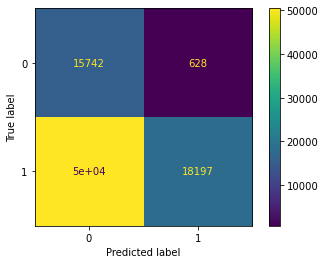

In [23]:
#get predictions 
preds = logreg.predict(X_test)

#plot confusion matrix
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot();

In [25]:
print(f'Various scores:  AUROC: {roc_auc_score(y_test, preds)}, ACC_SCORE: {accuracy_score(y_test, preds)}, REC_SCORE: {recall_score(y_test, preds)}, PREC_SCORE: {precision_score(y_test, preds)},F1: {f1_score(y_test, preds)}')


Various scores:  AUROC: 0.6133917892649143, ACC_SCORE: 0.3992823529411765, REC_SCORE: 0.2651464374180388, PREC_SCORE: 0.9666401062416998,F1: 0.4161454462294895


In [26]:
#create a list of the model classes to test
model_list = [
    #LogisticRegression(),
    #DecisionTreeClassifier(),
    #BaggingClassifier(),
    RandomForestClassifier()
    #ExtraTreesClassifier(),
    #AdaBoostClassifier(),
    #GradientBoostingClassifier()
]

In [27]:
#create a list to store each model's results in a dictionary
classifier_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj

    #fit the model
    model.fit(X_train_sc, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train_sc, y_train)
    results_dict['test_score'] = model.score(X_test_sc, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train_sc, y_train, cv = 5).mean()
        
    #add the dictionary to the list
    classifier_list.append(results_dict)

In [29]:
#To get just RF model scores
clf_results = pd.DataFrame(classifier_list)
clf_results

,model_name,train_score,test_score,cv_score
0,RandomForestClassifier(),0.999992,0.864153,0.863718


In [37]:
clf_results = pd.DataFrame(classifier_list)
clf_results

,model_name,train_score,test_score,cv_score
0,RandomForestClassifier(),0.999993,0.86312,0.861067
1,GradientBoostingClassifier(),0.849187,0.84690,0.848207


In [36]:
#Results before number of words and characters were added
clf_results = pd.DataFrame(classifier_list)
clf_results

,model_name,train_score,test_score,cv_score
0,LogisticRegression(),0.852340,0.85158,0.852060
1,DecisionTreeClassifier(),0.971040,0.85248,0.850940
2,BaggingClassifier(),0.965067,0.86543,0.864090
3,RandomForestClassifier(),0.971033,0.87157,0.872913
4,ExtraTreesClassifier(),0.971040,0.86230,0.861563
5,AdaBoostClassifier(),0.861270,0.86063,0.861053
6,GradientBoostingClassifier(),0.865297,0.86416,0.864963


In [32]:
# Build a model using Dropout
from tensorflow.keras.layers import Dropout

model_dropout = Sequential()

#First layer
model_dropout.add(Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)))
model_dropout.add(Dropout(0.5))

#Second layer
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.5))

#Output layer
model_dropout.add(Dense(1, activation='sigmoid'))

#COmpile the model
model_dropout.compile(loss='bce', optimizer='adam', metrics=['acc'])

results_dropout = model_dropout.fit(X_train_sc, y_train,
                                   validation_data=(X_test_sc, y_test),
                                   batch_size=9192,
                                   epochs=100,
                                   verbose=2)

Epoch 1/100
28/28 - 2s - loss: 0.8722 - acc: 0.5795 - val_loss: 0.4898 - val_acc: 0.8074
Epoch 2/100
28/28 - 1s - loss: 0.5199 - acc: 0.7926 - val_loss: 0.4229 - val_acc: 0.8115
Epoch 3/100
28/28 - 1s - loss: 0.4653 - acc: 0.7975 - val_loss: 0.3961 - val_acc: 0.8164
Epoch 4/100
28/28 - 1s - loss: 0.4362 - acc: 0.8061 - val_loss: 0.3833 - val_acc: 0.8223
Epoch 5/100
28/28 - 1s - loss: 0.4179 - acc: 0.8107 - val_loss: 0.3739 - val_acc: 0.8271
Epoch 6/100
28/28 - 1s - loss: 0.4048 - acc: 0.8157 - val_loss: 0.3669 - val_acc: 0.8293
Epoch 7/100
28/28 - 1s - loss: 0.3946 - acc: 0.8187 - val_loss: 0.3610 - val_acc: 0.8311
Epoch 8/100
28/28 - 1s - loss: 0.3853 - acc: 0.8221 - val_loss: 0.3560 - val_acc: 0.8336
Epoch 9/100
28/28 - 1s - loss: 0.3781 - acc: 0.8243 - val_loss: 0.3517 - val_acc: 0.8354
Epoch 10/100
28/28 - 1s - loss: 0.3718 - acc: 0.8276 - val_loss: 0.3477 - val_acc: 0.8367
Epoch 11/100
28/28 - 1s - loss: 0.3658 - acc: 0.8298 - val_loss: 0.3435 - val_acc: 0.8387
Epoch 12/100
28/28 

In [33]:
results_dropout = model_dropout.fit(X_train_sc, y_train,
                                   validation_data=(X_test_sc, y_test),
                                   batch_size=9192,
                                   epochs=100,
                                   verbose=2)

Epoch 1/100
28/28 - 1s - loss: 0.2920 - acc: 0.8619 - val_loss: 0.2973 - val_acc: 0.8630
Epoch 2/100
28/28 - 1s - loss: 0.2916 - acc: 0.8616 - val_loss: 0.2974 - val_acc: 0.8628
Epoch 3/100
28/28 - 1s - loss: 0.2913 - acc: 0.8621 - val_loss: 0.2967 - val_acc: 0.8633
Epoch 4/100
28/28 - 1s - loss: 0.2913 - acc: 0.8621 - val_loss: 0.2972 - val_acc: 0.8633
Epoch 5/100
28/28 - 1s - loss: 0.2912 - acc: 0.8624 - val_loss: 0.2974 - val_acc: 0.8631
Epoch 6/100
28/28 - 1s - loss: 0.2914 - acc: 0.8623 - val_loss: 0.2978 - val_acc: 0.8627
Epoch 7/100
28/28 - 1s - loss: 0.2911 - acc: 0.8623 - val_loss: 0.2972 - val_acc: 0.8629
Epoch 8/100
28/28 - 1s - loss: 0.2900 - acc: 0.8623 - val_loss: 0.2973 - val_acc: 0.8630
Epoch 9/100
28/28 - 1s - loss: 0.2907 - acc: 0.8630 - val_loss: 0.2974 - val_acc: 0.8636
Epoch 10/100
28/28 - 1s - loss: 0.2906 - acc: 0.8623 - val_loss: 0.2973 - val_acc: 0.8637
Epoch 11/100
28/28 - 1s - loss: 0.2907 - acc: 0.8621 - val_loss: 0.2975 - val_acc: 0.8635
Epoch 12/100
28/28 

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 300, max_features=50)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
print(rf.score(X_train, y_train), rf.score(X_test, y_test))

In [ ]:
rf = RandomForestClassifier(n_estimators = 300, max_depth=10, min_samples_leaf=2)
rf.fit(X_train,y_train)
print(rf.score(X_train, y_train), rf.score(X_test, y_test))

In [35]:
rf = RandomForestClassifier(n_estimators = 400, max_depth=20, min_samples_leaf=3, bootstrap=True)
rf.fit(X_train_sc,y_train)
print(rf.score(X_train_sc, y_train), rf.score(X_test_sc, y_test))

0.8462196078431372 0.8387764705882353


In [ ]:
rf = RandomForestClassifier(n_estimators = 300, max_depth=10, min_samples_leaf=3, bootstrap=False)
rf.fit(X_train,y_train)
print(rf.score(X_train, y_train), rf.score(X_test, y_test))

### Extra Trees?

In [ ]:
et = ExtraTreesClassifier(n_estimators = 300, max_depth=10, min_samples_leaf=2, bootstrap = True)
et.fit(X_train,y_train)
print(et.score(X_train, y_train), et.score(X_test, y_test))

In [ ]:
et = ExtraTreesClassifier(n_estimators = 300, max_depth=10, min_samples_leaf=2, bootstrap = False)
et.fit(X_train,y_train)
print(et.score(X_train, y_train), et.score(X_test, y_test))

### Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators=300)
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train), gb.score(X_test, y_test),  
      cross_val_score(gb, X_train, y_train, cv = 5).mean())

In [ ]:
#get predictions 
preds_gb = gb.predict(X_test)

#plot confusion matrix
cm = confusion_matrix(y_test, preds_gb)
ConfusionMatrixDisplay(cm, display_labels=['0','1','2','3']).plot();

In [ ]:
pd.DataFrame({'importance' : gb.feature_importances_, 'feature_names' : X_train.columns}).sort_values(by='importance', ascending=False).head(25)

In [ ]:
gb2 = GradientBoostingClassifier(n_estimators=500)
gb2.fit(X_train, y_train)
print(gb2.score(X_train, y_train), gb2.score(X_test, y_test),  
      cross_val_score(gb2, X_train, y_train, cv = 5).mean())

In [ ]:
gb3 = GradientBoostingClassifier(n_estimators=500, 
                        min_samples_split = 100, 
                        min_samples_leaf = 50, 
                        max_depth=8,
                        max_features='sqrt',
                        subsample=0.8)
gb3.fit(X_train, y_train)
print(gb3.score(X_train, y_train), gb3.score(X_test, y_test),  
      cross_val_score(gb3, X_train, y_train, cv = 5).mean())